# Simulation

In [11]:
from blackjacksim.entities import *
from blackjacksim.strategies import basic
from tqdm import tnrange
from tqdm import tqdm_notebook as tqdm
import pandas as pd
import matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
from multiprocessing import Process, Manager, Pool

    
def game(data, house, wallet, dealer, player, shoe, num_rounds=1):
    for t in range(num_rounds):
        s_pen = shoe.penetration
        s_state = shoe.state
        shoe = player.deal(shoe)
        shoe = dealer.deal(shoe)
        shoe = player.play(shoe, dealer.up_card)
        shoe = dealer.play(shoe, player.hands)
        for h in player.hands:
            wallet.take_payout(house.payout(h, dealer.hand))
        rw, rp = wallet.finish_round()
        house.finish_round()
        data.append({'Round':t,
                     'Pool':wallet.wager_pool, 
                     'Wager':rw, 
                     'Payout':rp, 
                     'Shoe Penetration':s_pen, 
                     'State':str(s_state), 
                     'Advantage':rp-rw,
                    'House':str(house)})
        shoe = dealer.inspect_shoe(shoe)
                
    return data

startingPool = 100
trials = 1000
#data = []
pbar = [Blackjack32(), Blackjack65(), Blackjack32NoSplit(), Blackjack65NoSplit()]
for house in pbar:
    for i in tnrange(trials):
        #pbar.set_description('{} at {:.1f}%'.format(str(house), 100*i/trials))
        wallet = PlayerWallet(1,startingPool)
        dealer = Dealer()
        player = Player(basic, wallet, house)
        shoe = Shoe(2,.75, house)
        data = game(data, house, wallet, dealer, player, shoe, num_rounds=100)
            
df = pd.DataFrame(list(data))

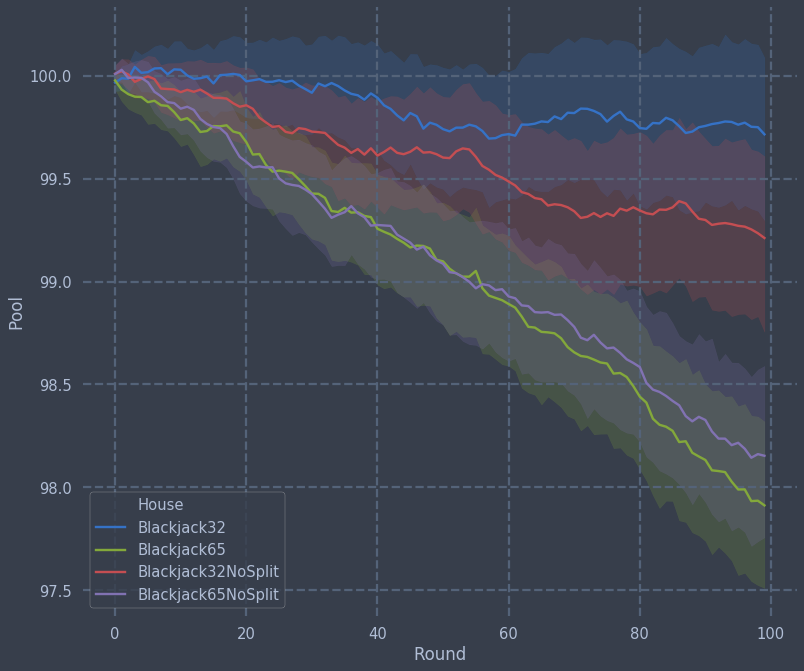

In [12]:
from jupyterthemes import jtplot
jtplot.style(context='poster', fscale=1.4, spines=False, gridlines='--')
#sns.countplot(x='Round', data=df)
#print(df.groupby('House').agg({'Advantage':['mean','std','var']}))
sns.lineplot(x='Round', y='Pool', hue='House', data=df)
plt.show()